<h1 align='center' style="color: blue;">Youtube stats </h1>



In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import spacy 
import nltk
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from gensim.models.ldamodel import LdaModel
from gensim import corpora, models
from nltk.corpus import stopwords
import plotly.express as px
import nltk
nltk.download('punkt')
import numpy as np
import nltk
nltk.download('wordnet')
from PIL import Image
from yellowbrick.text.freqdist import FreqDistVisualizer 
from wordcloud import WordCloud, ImageColorGenerator
palette = sns.color_palette("ch:s=.45,rot=-.15")
from collections import Counter
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
#!pip3 install -U spacy
#!python3 -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kirta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kirta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading the data

In [72]:
videos_df = pd.read_csv("videos-stats1.csv")
comments_df = pd.read_csv("comments.csv")

In [74]:
videos_df.isnull().sum() #no null values 

Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

####   Displaying keywords Distribuation after updating correct keywords to few video_id

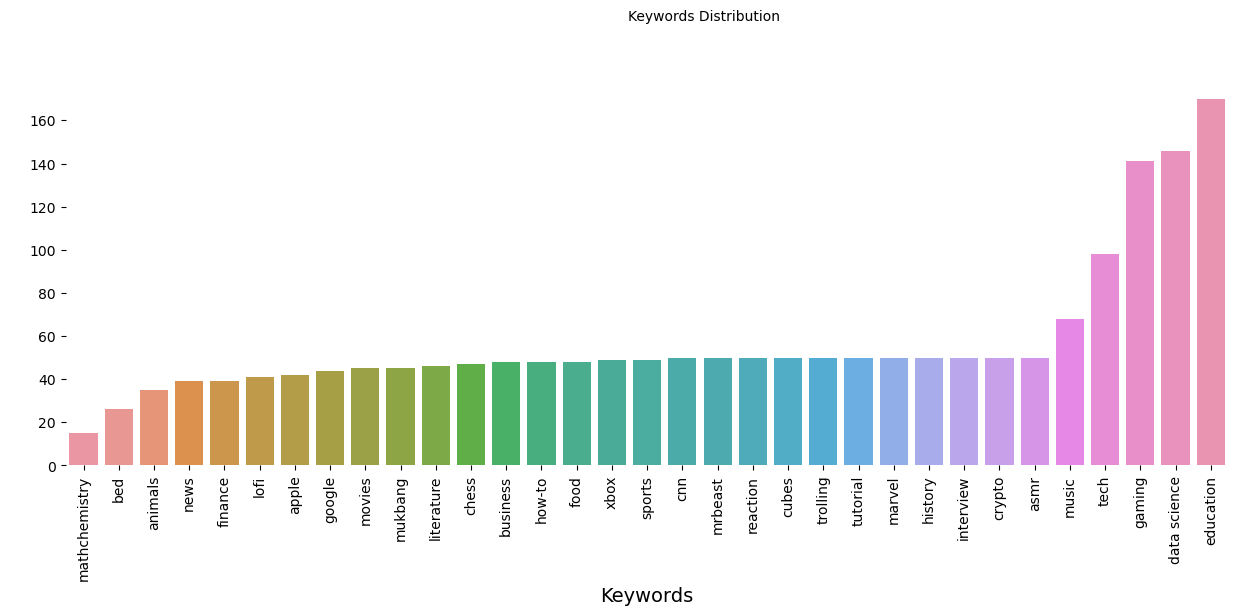

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data = videos_df, x = 'Keyword',ax=ax, order = videos_df['Keyword'].value_counts(ascending=True).index)
ax.set_xlabel(xlabel='Keywords', size=14)
ax.set_ylabel(ylabel=" ")
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90)
fig.text(0.5, 1,"Keywords Distribution")
plt.show()

In [77]:
videos_df['Published At'] = pd.to_datetime(videos_df['Published At'])
videos_df['Date']= videos_df['Published At'].dt.strftime('%m/%Y')
videos_df['Year']= videos_df['Published At'].dt.strftime('%Y')

#### Displaying  distribution of videos during different years

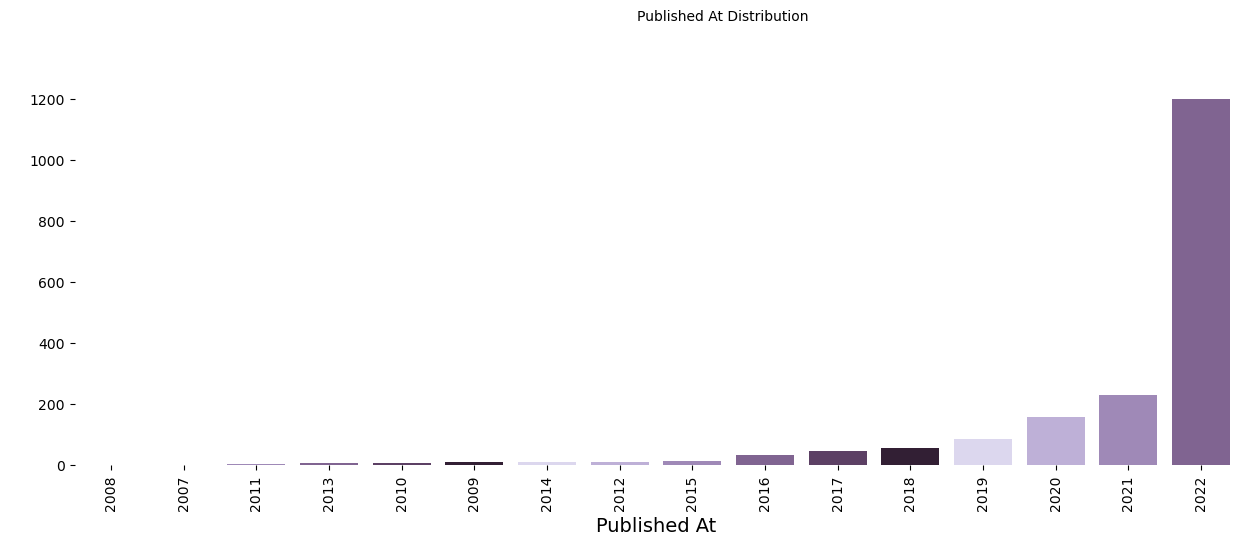

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data = videos_df, x = 'Year',ax=ax,palette=palette,order = videos_df['Year'].value_counts(ascending=True).index)
ax.set_xlabel(xlabel='Published At', size=14)
ax.set_ylabel(ylabel=" ")
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90)
fig.text(0.5, 1,"Published At Distribution")
plt.show()

In [8]:
keywords_interaction = videos_df.groupby(['Keyword']).sum().reset_index()

In [9]:
keywords_interaction['Interactions']=keywords_interaction['Likes']+keywords_interaction['Comments']
keywords_interaction = keywords_interaction.sort_values("Interactions")

#### Displaying  distribution of videos with most like and comments

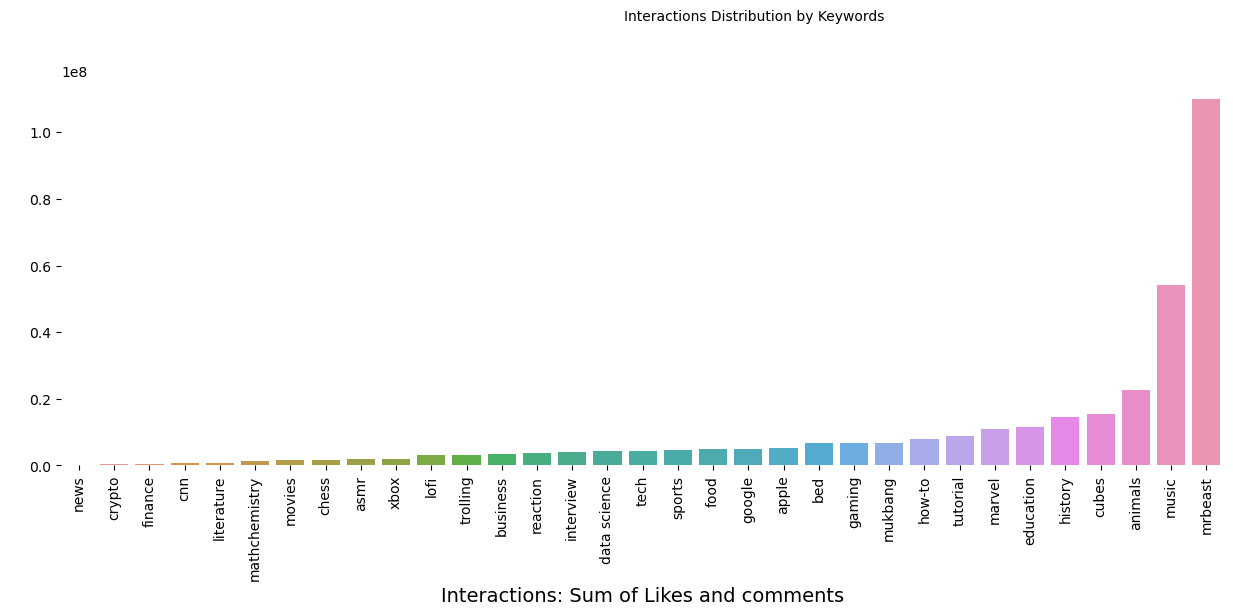

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(data=keywords_interaction, ax=ax,x='Keyword', y="Interactions")
ax.set_xlabel(xlabel='Interactions: Sum of Likes and comments', size=14)
ax.set_ylabel(ylabel=" ")
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90)
fig.text(0.5, 1,"Interactions Distribution by Keywords")
plt.show()

#### Videos with keyword arranged by Maximum,minimum,average and total views

In [11]:
keyword_df = videos_df[['Keyword', 'Views']].groupby(['Keyword']).agg(['max', 'min', 'mean', 'sum'])
keyword_df.sort_values(by=('Views', 'sum'), ascending=False).style.background_gradient(cmap='Reds')

#### No. of Views for each keyword using mean

In [12]:
px.histogram(x=keyword_df['Views']['mean'].sort_values(ascending=True).index, y=keyword_df['Views']['mean'].sort_values(ascending=True), color_discrete_sequence=["skyblue"],labels={'x':'keywords', 'y':'likes'},title='Number of Views')

In [79]:
titles_df = videos_df[['Keyword','Title']]
titles_df = titles_df.groupby(['Keyword'], as_index=False).agg({'Title': ' '.join})

In [80]:
nlp = spacy.load("en_core_web_sm")
stops = stopwords.words("english")

#### Using lemmatizer and stopwords to clean the Titles

In [81]:

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma.isalpha() or lemma.isnumeric():
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


titles_df['Clean_Titles'] = titles_df['Title'].apply(normalize, lowercase=True, remove_stopwords=True)

In [82]:
titles_df.head() ## displaying clean titles next to title to see the difference 

Keyword                                              Title  \
0   animals  Martin Garrix - Animals (Official Video) ONE H...   
1     apple  Apple Announces Fall iPhone Event (iPhone 14, ...   
2      asmr  4K ASMR | Pulling, Snipping, Tweezing, Removin...   
3       bed  OVERNIGHT IN THE WORLD&#39;S MOST DANGEROUS BE...   
4  business  Tiësto - The Business (Official Music Video) T...   

                                        Clean_Titles  
0  martin garrix animal official video one hour a...  
1  apple announce fall iphone event iphone 14 app...  
2  asmr pulling snipping tweezing remove anxiety ...  
3  overnight dangerous bed powfu death bed lyric ...  
4  tiësto business official music video tiesto bu...

In [17]:
keys = ['movies','music','sports', 'data science', 'education','food']  # using important keywords to display
key_to_visualize = titles_df.apply(lambda row: row[titles_df['Keyword'].isin(keys)])
key_to_visualize

Keyword                                              Title  \
9   data science  What is Computer Science? 100+ Computer Scienc...   
10     education  How to escape education&#39;s death valley | S...   
12          food  20 Comfort Foods From Around The World Popular...   
22        movies  Lifetime Movies (2022) #LMN Movies ~ New Lifet...   
25         music  El Chombo - Dame Tu Cosita feat. Cutty Ranks (...   
28        sports  1000 IQ Moments in Sports Chelsea v. Tottenham...   

                                         Clean_Titles  
9   computer science 100 computer science concept ...  
10  escape death valley sir ken robinson education...  
12  20 comfort food around world popular fast food...  
22  lifetime movie 2022 lmn movie new lifetime 202...  
25  el chombo dame tu cosita feat cutty rank offic...  
28  1000 iq moment sport chelsea tottenham hotspur...

#### Using Clean titles to create word cloud based on specific keywords

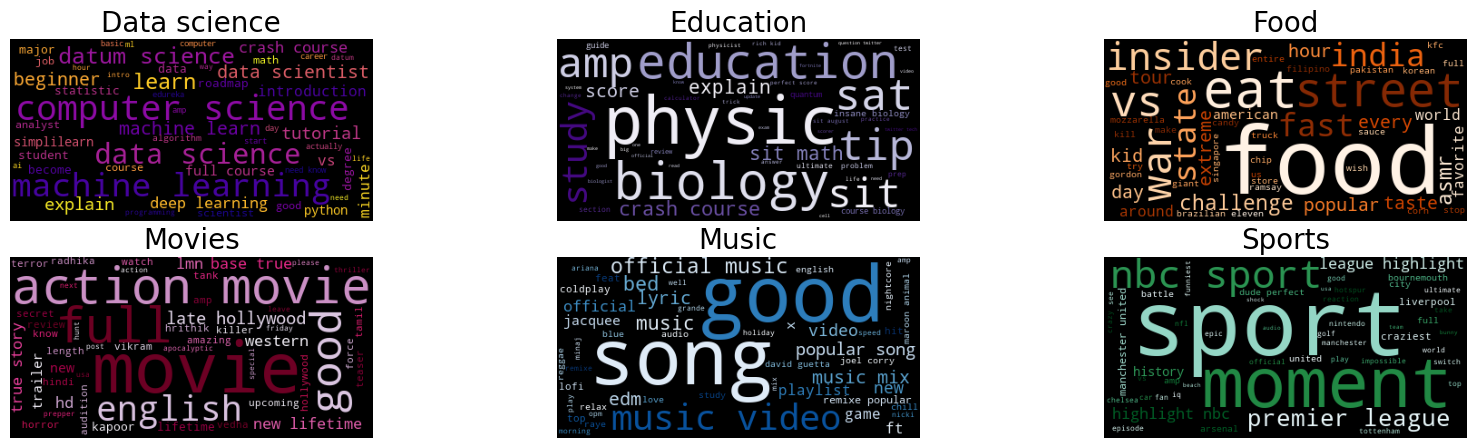

In [18]:
from wordcloud import WordCloud
plt.figure(figsize=(20, 8))
colormaps = ['plasma', 'Purples','Oranges','PuRd', 'Blues', 'BuGn']

for i,value in enumerate(key_to_visualize['Keyword'].unique()):
    plt.subplot(3,3,i+1)
    plt.title(value.capitalize(),fontsize=20)
    plt.imshow(WordCloud(colormap = colormaps[i],max_words=50).generate(text = ' '.join(key_to_visualize[key_to_visualize['Keyword']==value]['Clean_Titles'])))
    plt.axis('off')

In [121]:
videos_df1=videos_df.drop('Unnamed: 0',axis=1)
videos_df1.head()

Title     Video ID  \
0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1                    The most EXPENSIVE thing I own.  b3x28s61q3c   
2                 My New House Gaming Setup is SICK!  4mgePWWCAmA   
3  Petrol Vs Liquid Nitrogen | Freezing Experimen...  kXiYSI7H2b0   
4                     Best Back to School Tech 2022!  ErMwWXQxHp0   

  Published At Keyword  Likes  Comments    Views     Date  Year  
0   2022-08-23    tech   3407       672   135612  08/2022  2022  
1   2022-08-24    tech  76779      4306  1758063  08/2022  2022  
2   2022-08-23    tech  63825      3338  1564007  08/2022  2022  
3   2022-08-23    tech  71566      1426   922918  08/2022  2022  
4   2022-08-08    tech  96513      5155  1855644  08/2022  2022

####  Below graph shows correlation between 
- likes
- comments 
- views


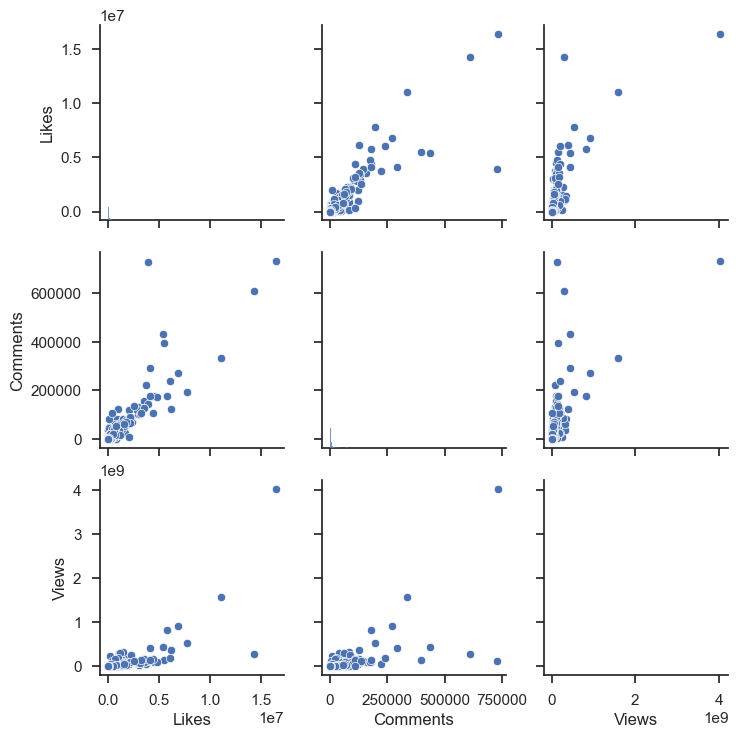

In [124]:
sns.set_theme(style="ticks")


sns.pairplot(videos_df1)

#### Comments data with likes and sentiments of users 

In [19]:
comments_df.head()

Unnamed: 0     Video ID                                            Comment  \
0           0  wAZZ-UWGVHI  Let's not forget that Apple Pay in 2014 requir...   
1           1  wAZZ-UWGVHI  Here in NZ 50% of retailers don’t even have co...   
2           2  wAZZ-UWGVHI  I will forever acknowledge this channel with t...   
3           3  wAZZ-UWGVHI  Whenever I go to a place that doesn’t take App...   
4           4  wAZZ-UWGVHI  Apple Pay is so convenient, secure, and easy t...   

   Likes  Sentiment  
0   95.0        1.0  
1   19.0        0.0  
2  161.0        2.0  
3    8.0        0.0  
4   34.0        2.0

#### Merging both data on Video_id and dropping unnamed columns

In [20]:
merged_df = videos_df.merge(comments_df, on = 'Video ID')
merged_df.drop(columns=["Unnamed: 0_x"], inplace=True)#droping unnames columns 
merged_df.drop(columns=["Unnamed: 0_y"], inplace=True)#droping unnames columns 
merged_df.Sentiment = merged_df.Sentiment.astype(int)
merged_df.head()

Title     Video ID  \
0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
2  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
3  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
4  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   

  Published At Keyword  Likes_x  Comments   Views     Date  Year  \
0   2022-08-23    tech     3407       672  135612  08/2022  2022   
1   2022-08-23    tech     3407       672  135612  08/2022  2022   
2   2022-08-23    tech     3407       672  135612  08/2022  2022   
3   2022-08-23    tech     3407       672  135612  08/2022  2022   
4   2022-08-23    tech     3407       672  135612  08/2022  2022   

                                             Comment  Likes_y  Sentiment  
0  Let's not forget that Apple Pay in 2014 requir...     95.0          1  
1  Here in NZ 50% of retailers don’t even have co...     19.0          0  
2  I will forever acknowledge this channel with t...    161.0          2  
3  Whenever I go to a place that doesn’t take App...      8.0          0  
4  Apple Pay is so convenient, secure, and easy t...     34.0          2

#### Replacing sentiments from 1 to 0 and making two category 0-negative and 2-positive 

In [83]:
merged_df['Sentiment'] =merged_df['Sentiment'].replace(1,0)


In [84]:
merged_df.head()

Title     Video ID  \
0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
2  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
3  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
4  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   

  Published At Keyword  Video_likes  Comments   Views     Date  Year  \
0   2022-08-23    tech         3407       672  135612  08/2022  2022   
1   2022-08-23    tech         3407       672  135612  08/2022  2022   
2   2022-08-23    tech         3407       672  135612  08/2022  2022   
3   2022-08-23    tech         3407       672  135612  08/2022  2022   
4   2022-08-23    tech         3407       672  135612  08/2022  2022   

                                             Comment  Comments_likes  \
0  Let's not forget that Apple Pay in 2014 requir...            95.0   
1  Here in NZ 50% of retailers don’t even have co...            19.0   
2  I will forever acknowledge this channel with t...           161.0   
3  Whenever I go to a place that doesn’t take App...             8.0   
4  Apple Pay is so convenient, secure, and easy t...            34.0   

   Sentiment  
0          0  
1          0  
2          2  
3          0  
4          2

In [85]:
merged_df.rename(columns={'Likes_x':'Video_likes'}, inplace=True)
merged_df.rename(columns={'Likes_y':'Comments_likes'}, inplace=True)
merged_df.head()

Title     Video ID  \
0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
2  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
3  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
4  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   

  Published At Keyword  Video_likes  Comments   Views     Date  Year  \
0   2022-08-23    tech         3407       672  135612  08/2022  2022   
1   2022-08-23    tech         3407       672  135612  08/2022  2022   
2   2022-08-23    tech         3407       672  135612  08/2022  2022   
3   2022-08-23    tech         3407       672  135612  08/2022  2022   
4   2022-08-23    tech         3407       672  135612  08/2022  2022   

                                             Comment  Comments_likes  \
0  Let's not forget that Apple Pay in 2014 requir...            95.0   
1  Here in NZ 50% of retailers don’t even have co...            19.0   
2  I will forever acknowledge this channel with t...           161.0   
3  Whenever I go to a place that doesn’t take App...             8.0   
4  Apple Pay is so convenient, secure, and easy t...            34.0   

   Sentiment  
0          0  
1          0  
2          2  
3          0  
4          2

#### Checking if there is any null values

In [86]:
merged_df.isnull().sum()

Title             0
Video ID          0
Published At      0
Keyword           0
Video_likes       0
Comments          0
Views             0
Date              0
Year              0
Comment           1
Comments_likes    0
Sentiment         0
dtype: int64

In [89]:

merged_df.dropna(inplace=True)# dropping blank row 

In [90]:
merged_df.isnull().sum() # no blanks 

Title             0
Video ID          0
Published At      0
Keyword           0
Video_likes       0
Comments          0
Views             0
Date              0
Year              0
Comment           0
Comments_likes    0
Sentiment         0
dtype: int64

In [91]:
sentiment_df = merged_df.groupby(['Keyword','Sentiment']).count()
sentiment_df = sentiment_df.stack().to_frame().reset_index()

#### Distribution of negative and postive sentiments based on keywords 

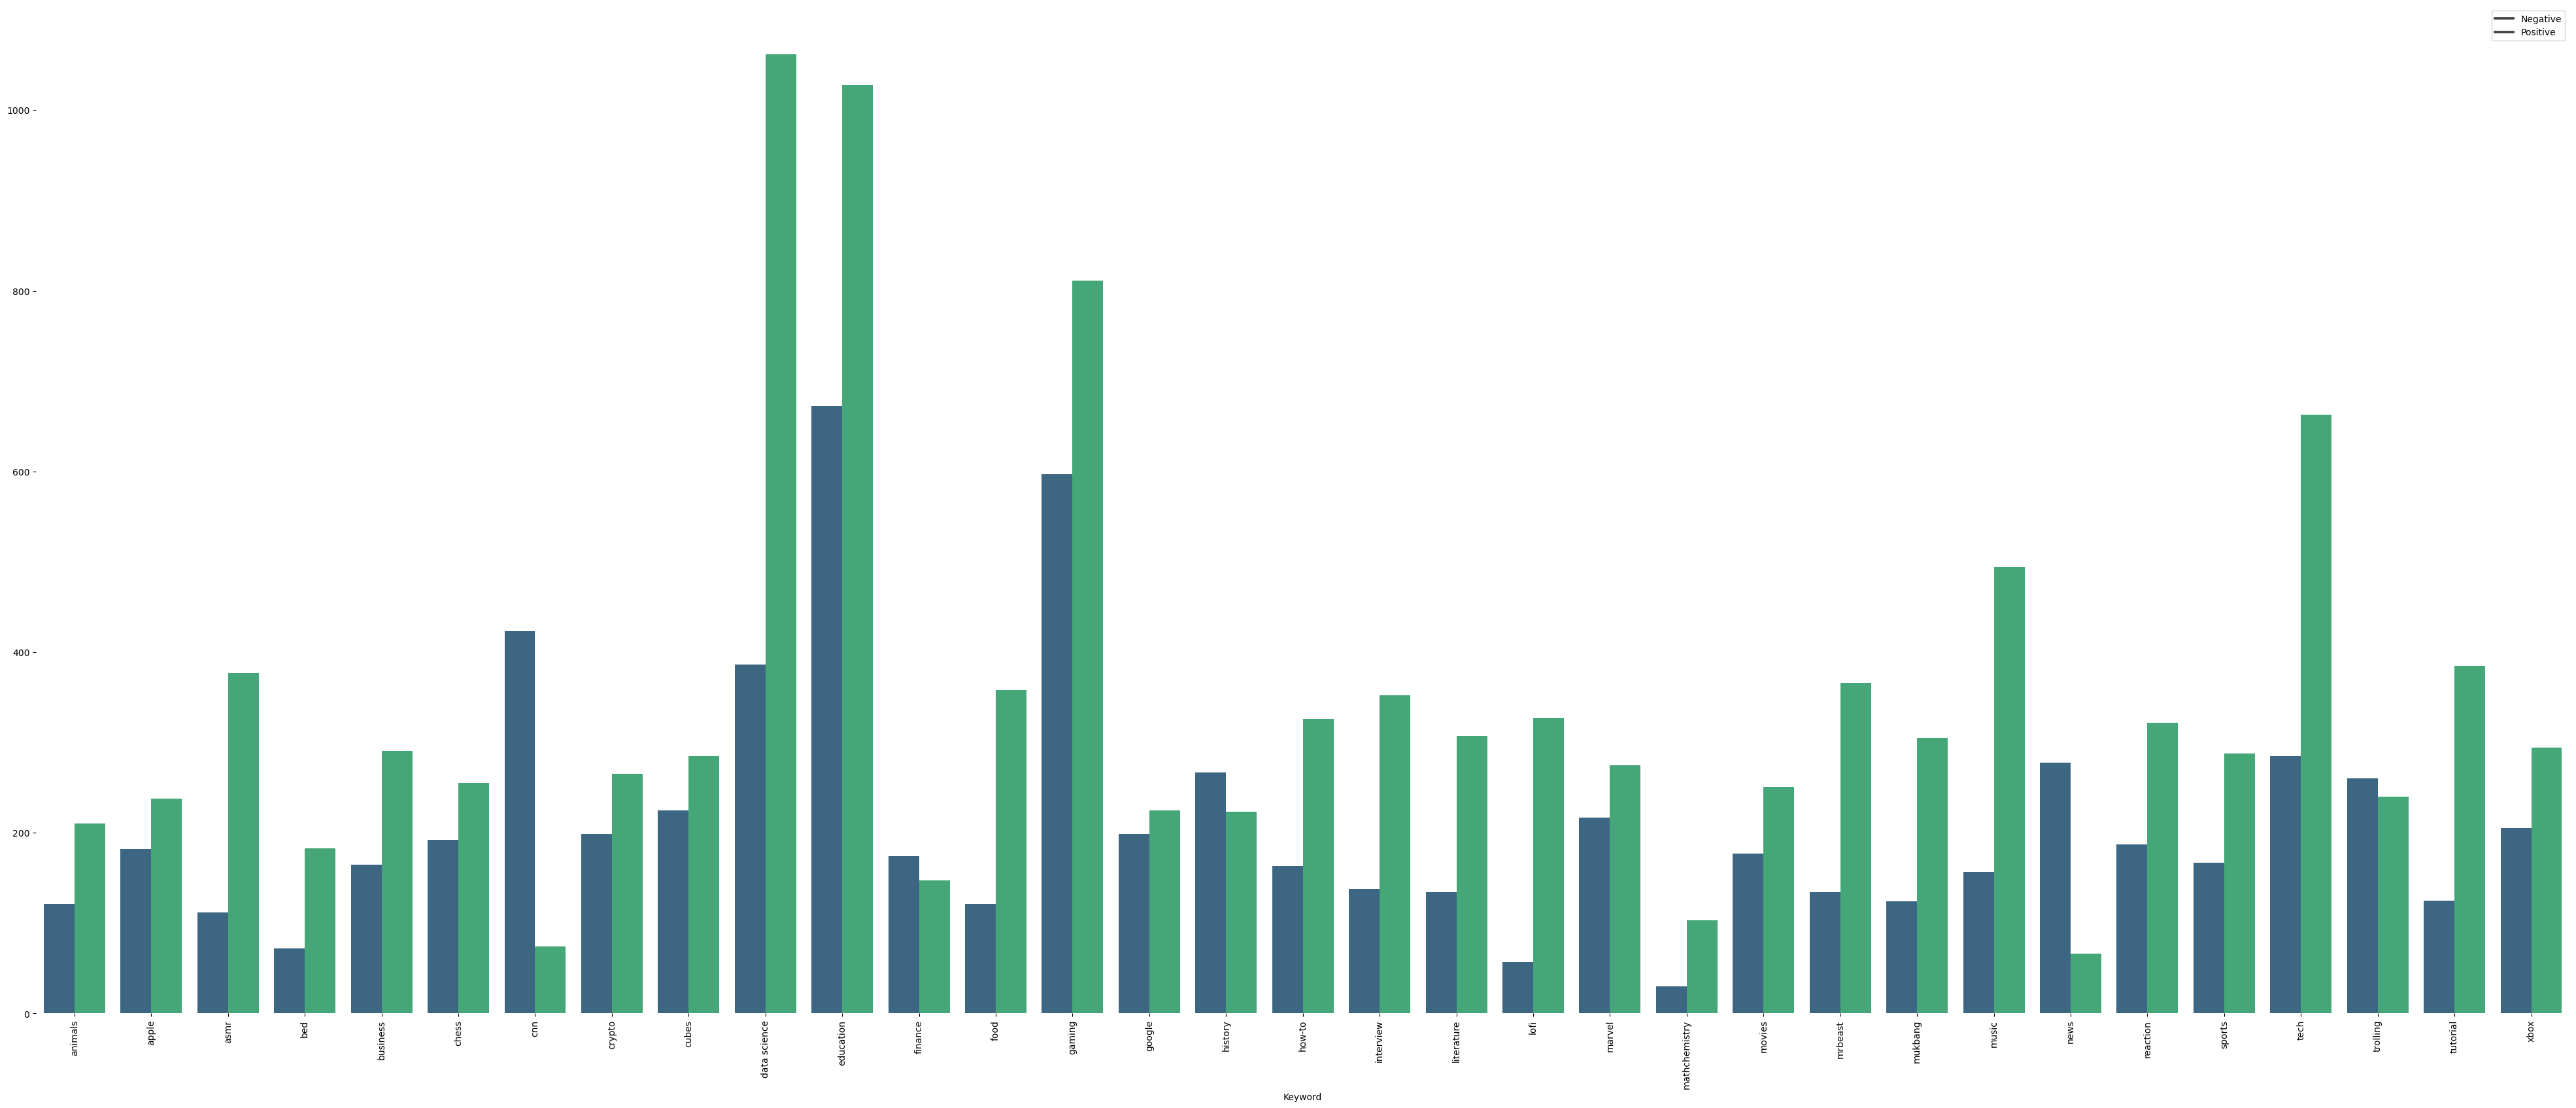

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(50,20))
sns.barplot(x="Keyword", y=0, hue="Sentiment", data=sentiment_df,palette='viridis')
plt.xticks(rotation=90)
plt.ylabel(ylabel="")
sns.despine(bottom=True, left=True)
L=plt.legend(loc='upper left')
ax.legend(['Negative', 'Positive'])
plt.show()

##### Applying clean data and adding Clean comment column

In [28]:
merged_df['Comment_cleaned'] = merged_df['Comment'].apply(normalize, lowercase=True, remove_stopwords=True)

In [96]:
merged_df.head()

Title     Video ID  \
0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
2  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
3  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
4  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   

  Published At Keyword  Video_likes  Comments   Views     Date  Year  \
0   2022-08-23    tech         3407       672  135612  08/2022  2022   
1   2022-08-23    tech         3407       672  135612  08/2022  2022   
2   2022-08-23    tech         3407       672  135612  08/2022  2022   
3   2022-08-23    tech         3407       672  135612  08/2022  2022   
4   2022-08-23    tech         3407       672  135612  08/2022  2022   

                                             Comment  Comments_likes  \
0  Let's not forget that Apple Pay in 2014 requir...            95.0   
1  Here in NZ 50% of retailers don’t even have co...            19.0   
2  I will forever acknowledge this channel with t...           161.0   
3  Whenever I go to a place that doesn’t take App...             8.0   
4  Apple Pay is so convenient, secure, and easy t...            34.0   

   Sentiment                                    Comment_cleaned  
0          0  let us forget apple pay 2014 require brand new...  
1          0  nz 50 retailer even contactless credit card ma...  
2          2  I forever acknowledge channel help lesson idea...  
3          0  whenever I go place take apple pay happen ofte...  
4          2  apple pay convenient secure easy use I use kor...

#### Word cloud showing words used in <span style="color:red"> Negative</span> sentiments 


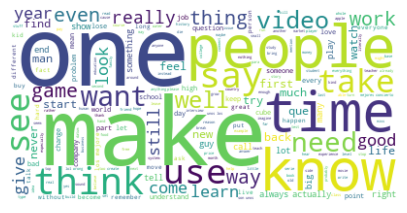

In [135]:
negative = merged_df.loc[merged_df.Sentiment==0,['Comment_cleaned']]
negativetext = " ".join(i for i in negative.Comment_cleaned)



wc = WordCloud(max_font_size=100, background_color="white",regexp='[A-Za-z]+',contour_width=3, 
               contour_color='red',min_word_length=3)
wc.generate(negativetext)

plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

#### Word cloud showing words used in  <span style="color:lightgreen">Positive</span>  sentiments

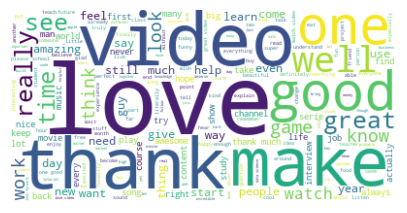

In [136]:
postitive = merged_df.loc[merged_df.Sentiment==2,['Comment_cleaned']]
postivetext = " ".join(i for i in postitive.Comment_cleaned)


wc = WordCloud(max_font_size=100, background_color="white",regexp='[A-Za-z]+',contour_width=3, 
               contour_color='red',min_word_length=3)
wc.generate(postivetext)

plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [114]:
keys1 = ['movies','music','sports', 'data science', 'education','food']  # using important keywords to display
key_to_visualize1 = merged_df.apply(lambda row: row[merged_df['Keyword'].isin(keys1)])
key_to_visualize1.head()

Title     Video ID Published At Keyword  \
1265  1000 IQ Moments in Sports  AqvyzO3IPXc   2022-03-31  sports   
1266  1000 IQ Moments in Sports  AqvyzO3IPXc   2022-03-31  sports   
1267  1000 IQ Moments in Sports  AqvyzO3IPXc   2022-03-31  sports   
1268  1000 IQ Moments in Sports  AqvyzO3IPXc   2022-03-31  sports   
1269  1000 IQ Moments in Sports  AqvyzO3IPXc   2022-03-31  sports   

      Video_likes  Comments    Views     Date  Year  \
1265        39944      1677  5093587  03/2022  2022   
1266        39944      1677  5093587  03/2022  2022   
1267        39944      1677  5093587  03/2022  2022   
1268        39944      1677  5093587  03/2022  2022   
1269        39944      1677  5093587  03/2022  2022   

                                                Comment  Comments_likes  \
1265  the fake slide is unfair to the defense... you...          3163.0   
1266  For people complaining on the fake slide, it W...           804.0   
1267  3:45 seein bill get all excited like that desc...           306.0   
1268  I'm not into sports at all, but, damn I am so ...            20.0   
1269  New video idea: can you do “The game is not ov...           893.0   

      Sentiment                                    Comment_cleaned  
1265          0  fake slide unfair defense pursue get penalize ...  
1266          0  people complain fake slide absolutely legal ti...  
1267          2  seein bill get excited like describe play let ...  
1268          2  I sport damn I amazed guy act like one mind si...  
1269          0                     new video idea game yet moment

#### Using Clean  user comments  to  create word cloud based on specific keywords  

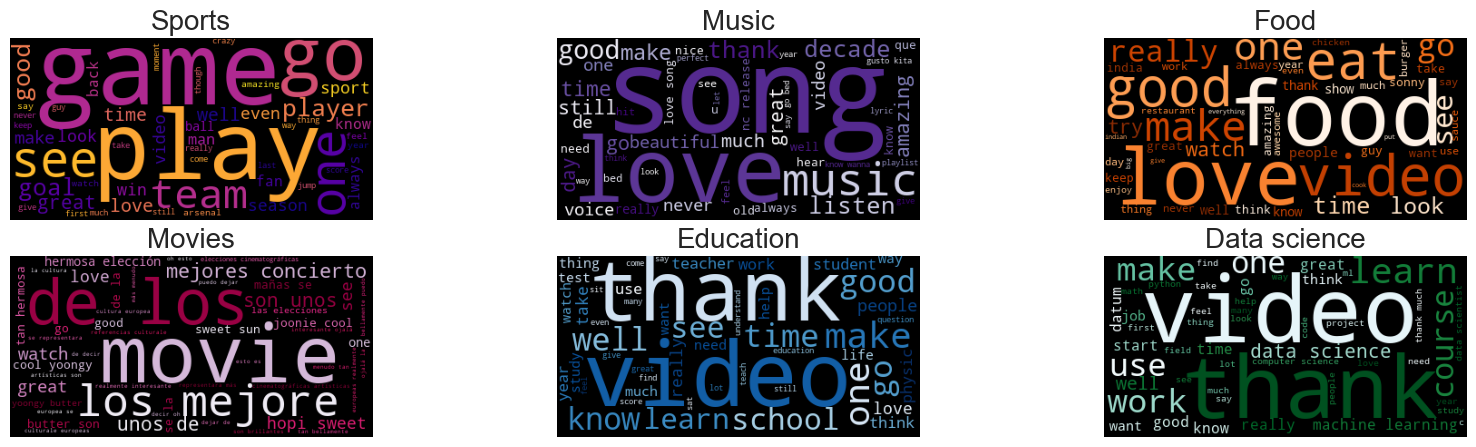

In [115]:
plt.figure(figsize=(20, 8))
colormaps = ['plasma', 'Purples','Oranges','PuRd', 'Blues', 'BuGn']

for i,value in enumerate(key_to_visualize1['Keyword'].unique()):
    plt.subplot(3,3,i+1)
    plt.title(value.capitalize(),fontsize=20)
    plt.imshow(WordCloud(colormap = colormaps[i],max_words=50).generate(text = ' '.join(key_to_visualize1[key_to_visualize1['Keyword']==value]['Comment_cleaned'])))
    plt.axis('off')

In [93]:
en_stopwords = nltk.corpus.stopwords.words('english')
es_stopwords = nltk.corpus.stopwords.words('spanish')
lemmatizer = WordNetLemmatizer()
def text_preprocessing(txt,return_array = False):
    tokens = nltk.word_tokenize(txt.lower())
    tokens = [w for w in tokens if w.isalpha()]  
    tokens = [w for w in tokens if w not in en_stopwords]
    tokens = [w for w in tokens if w not in es_stopwords]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    if not return_array:
        tokens = " ".join(tokens)
    return tokens

def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTOPIC #{}: ".format(index)
        message += ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("-"*180)

In [94]:
comments_df['prep_comment'] = comments_df.apply(lambda x: text_preprocessing(x['Comment']),axis=1)

Title     Video ID  \
0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
2  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
3  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
4  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   

  Published At Keyword  Video_likes  Comments   Views     Date  Year  \
0   2022-08-23    tech         3407       672  135612  08/2022  2022   
1   2022-08-23    tech         3407       672  135612  08/2022  2022   
2   2022-08-23    tech         3407       672  135612  08/2022  2022   
3   2022-08-23    tech         3407       672  135612  08/2022  2022   
4   2022-08-23    tech         3407       672  135612  08/2022  2022   

                                             Comment  Comments_likes  \
0  Let's not forget that Apple Pay in 2014 requir...            95.0   
1  Here in NZ 50% of retailers don’t even have co...            19.0   
2  I will forever acknowledge this channel with t...           161.0   
3  Whenever I go to a place that doesn’t take App...             8.0   
4  Apple Pay is so convenient, secure, and easy t...            34.0   

   Sentiment                                    Comment_cleaned  
0          0  let us forget apple pay 2014 require brand new...  
1          0  nz 50 retailer even contactless credit card ma...  
2          2  I forever acknowledge channel help lesson idea...  
3          0  whenever I go place take apple pay happen ofte...  
4          2  apple pay convenient secure easy use I use kor...

In [ ]:
comments_df['prep_comment'] = comments_df.apply(lambda x: text_preprocessing(x['Comment']),axis=1)

In [95]:
comments_df

Unnamed: 0     Video ID  \
0               0  wAZZ-UWGVHI   
1               1  wAZZ-UWGVHI   
2               2  wAZZ-UWGVHI   
3               3  wAZZ-UWGVHI   
4               4  wAZZ-UWGVHI   
...           ...          ...   
18404       18404  cyLWtMSry58   
18405       18405  cyLWtMSry58   
18406       18406  cyLWtMSry58   
18407       18407  cyLWtMSry58   
18408       18408  cyLWtMSry58   

                                                 Comment  Likes  Sentiment  
0      Let's not forget that Apple Pay in 2014 requir...   95.0        1.0  
1      Here in NZ 50% of retailers don’t even have co...   19.0        0.0  
2      I will forever acknowledge this channel with t...  161.0        2.0  
3      Whenever I go to a place that doesn’t take App...    8.0        0.0  
4      Apple Pay is so convenient, secure, and easy t...   34.0        2.0  
...                                                  ...    ...        ...  
18404  I really like the point about engineering tool...    0.0        2.0  
18405  I’ve just started exploring this field. And th...   20.0        2.0  
18406  Excelente video con una pregunta filosófica pr...    1.0        1.0  
18407  Hey Daniel, just discovered your channel a cou...   35.0        2.0  
18408  This is great. Focus is key. A playful approac...    0.0        2.0  

[18409 rows x 5 columns]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer  # doing bag of words 
vectorizer = CountVectorizer(min_df=5, max_df= 0.95)
comments_transform = vectorizer.fit_transform(comments_df.prep_comment)

In [32]:
comments_transform

<18409x6372 sparse matrix of type '<class 'numpy.int64'>'
	with 240683 stored elements in Compressed Sparse Row format>

In [63]:
lda = LatentDirichletAllocation(n_components=5, max_iter=100,
                               learning_method = 'online',
                                 random_state = 0)

In [67]:
lda.fit(comments_transform)

LatentDirichletAllocation(learning_method='online', max_iter=100,
                          n_components=5, random_state=0)

In [68]:
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names,n_top_words=10)


Topics in LDA model: 

TOPIC #0: video, like, thank, really, game, great, get, much, one, work
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

TOPIC #1: one, made, time, way, like, know, every, got, people, movie
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

TOPIC #2: food, appreciate, market, trying, perfect, project, top, second, math, crypto
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

TOPIC #3: love, amazing, keep, video, like, look, good, way, man, put
----------------------------------------------------------------------------------------------------------------------------------

In [35]:
comments_df['prep_comment']

0        let forget apple pay required brand new iphone...
1        nz retailer even contactless credit card machi...
2        forever acknowledge channel help lesson idea e...
3        whenever go place take apple pay happen often ...
4        apple pay convenient secure easy use used kore...
                               ...                        
18404    really like point engineering toolbox think lo...
18405    started exploring field really good reminder g...
18406    excelente video pregunta filosófica profunda g...
18407    hey daniel discovered channel couple day ago l...
18408    great focus key playful approach also speed th...
Name: prep_comment, Length: 18409, dtype: object

In [36]:
decode_map = {0.0: "NEGATIVE", 1.0: "NEGATIVE", 2.0: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [37]:
comments_df.Sentiment = comments_df.Sentiment.apply(lambda x: decode_sentiment(x))

In [38]:
sentiment_df1 = merged_df.groupby(['Keyword','Sentiment']).count()
sentiment_df1 = sentiment_df.stack().to_frame().reset_index()

### Showing count of postive and negative

Text(0.5, 1.0, 'Sentiment labels distribuition')

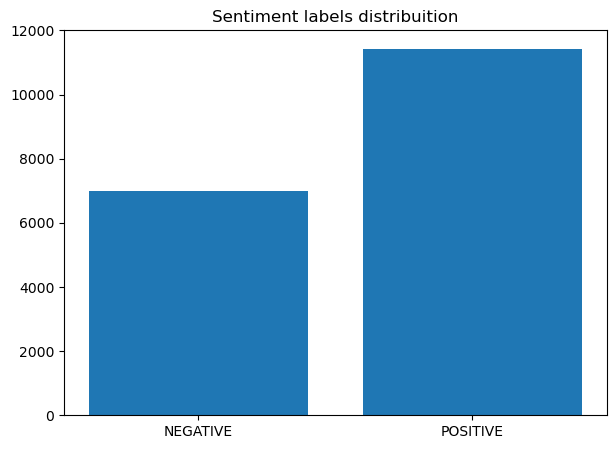

In [39]:
Sentiment_cnt = Counter(comments_df.Sentiment)

plt.figure(figsize=(7,5))
plt.bar(Sentiment_cnt.keys(), Sentiment_cnt.values())
plt.title("Sentiment labels distribuition")

In [40]:
Sentiment_cnt

Counter({'NEGATIVE': 6977, 'POSITIVE': 11432})

In [41]:
comments_df.head()

Unnamed: 0     Video ID                                            Comment  \
0           0  wAZZ-UWGVHI  Let's not forget that Apple Pay in 2014 requir...   
1           1  wAZZ-UWGVHI  Here in NZ 50% of retailers don’t even have co...   
2           2  wAZZ-UWGVHI  I will forever acknowledge this channel with t...   
3           3  wAZZ-UWGVHI  Whenever I go to a place that doesn’t take App...   
4           4  wAZZ-UWGVHI  Apple Pay is so convenient, secure, and easy t...   

   Likes Sentiment                                       prep_comment  
0   95.0  NEGATIVE  let forget apple pay required brand new iphone...  
1   19.0  NEGATIVE  nz retailer even contactless credit card machi...  
2  161.0  POSITIVE  forever acknowledge channel help lesson idea e...  
3    8.0  NEGATIVE  whenever go place take apple pay happen often ...  
4   34.0  POSITIVE  apple pay convenient secure easy use used kore...

In [42]:
Sentiment_data=comments_df[['Video ID','prep_comment','Sentiment','Likes']]
Sentiment_data

Video ID                                       prep_comment  \
0      wAZZ-UWGVHI  let forget apple pay required brand new iphone...   
1      wAZZ-UWGVHI  nz retailer even contactless credit card machi...   
2      wAZZ-UWGVHI  forever acknowledge channel help lesson idea e...   
3      wAZZ-UWGVHI  whenever go place take apple pay happen often ...   
4      wAZZ-UWGVHI  apple pay convenient secure easy use used kore...   
...            ...                                                ...   
18404  cyLWtMSry58  really like point engineering toolbox think lo...   
18405  cyLWtMSry58  started exploring field really good reminder g...   
18406  cyLWtMSry58  excelente video pregunta filosófica profunda g...   
18407  cyLWtMSry58  hey daniel discovered channel couple day ago l...   
18408  cyLWtMSry58  great focus key playful approach also speed th...   

      Sentiment  Likes  
0      NEGATIVE   95.0  
1      NEGATIVE   19.0  
2      POSITIVE  161.0  
3      NEGATIVE    8.0  
4      POSITIVE   34.0  
...         ...    ...  
18404  POSITIVE    0.0  
18405  POSITIVE   20.0  
18406  NEGATIVE    1.0  
18407  POSITIVE   35.0  
18408  POSITIVE    0.0  

[18409 rows x 4 columns]

In [43]:
keywords_interaction = Sentiment_data.groupby(['Sentiment']).sum().reset_index() # shows number of likes on comments 
keywords_interaction

Sentiment      Likes
0  NEGATIVE  9294777.0
1  POSITIVE  9850941.0

#### Showing percentage of likes  on comments 

<function matplotlib.pyplot.show(close=None, block=None)>

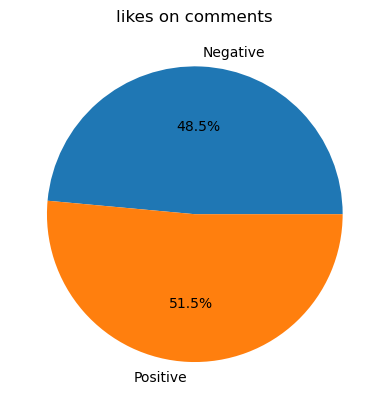

In [44]:
labels= ['Negative', 'Positive']
plt.pie(keywords_interaction['Likes'],labels =['Negative', 'Positive'],autopct='%.1f%%' )
plt.title('likes on comments')
plt.show

In [45]:
Sentiment_data['Sentiment'] =Sentiment_data['Sentiment'].replace("NEGATIVE",0)

Sentiment_data

C:\Users\kirta\AppData\Local\Temp\ipykernel_10516\732694429.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Video ID                                       prep_comment  \
0      wAZZ-UWGVHI  let forget apple pay required brand new iphone...   
1      wAZZ-UWGVHI  nz retailer even contactless credit card machi...   
2      wAZZ-UWGVHI  forever acknowledge channel help lesson idea e...   
3      wAZZ-UWGVHI  whenever go place take apple pay happen often ...   
4      wAZZ-UWGVHI  apple pay convenient secure easy use used kore...   
...            ...                                                ...   
18404  cyLWtMSry58  really like point engineering toolbox think lo...   
18405  cyLWtMSry58  started exploring field really good reminder g...   
18406  cyLWtMSry58  excelente video pregunta filosófica profunda g...   
18407  cyLWtMSry58  hey daniel discovered channel couple day ago l...   
18408  cyLWtMSry58  great focus key playful approach also speed th...   

      Sentiment  Likes  
0             0   95.0  
1             0   19.0  
2      POSITIVE  161.0  
3             0    8.0  
4      POSITIVE   34.0  
...         ...    ...  
18404  POSITIVE    0.0  
18405  POSITIVE   20.0  
18406         0    1.0  
18407  POSITIVE   35.0  
18408  POSITIVE    0.0  

[18409 rows x 4 columns]

In [46]:
Sentiment_data['Sentiment'] =Sentiment_data['Sentiment'].replace("POSITIVE",1)

Sentiment_data

C:\Users\kirta\AppData\Local\Temp\ipykernel_10516\1523749530.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Video ID                                       prep_comment  \
0      wAZZ-UWGVHI  let forget apple pay required brand new iphone...   
1      wAZZ-UWGVHI  nz retailer even contactless credit card machi...   
2      wAZZ-UWGVHI  forever acknowledge channel help lesson idea e...   
3      wAZZ-UWGVHI  whenever go place take apple pay happen often ...   
4      wAZZ-UWGVHI  apple pay convenient secure easy use used kore...   
...            ...                                                ...   
18404  cyLWtMSry58  really like point engineering toolbox think lo...   
18405  cyLWtMSry58  started exploring field really good reminder g...   
18406  cyLWtMSry58  excelente video pregunta filosófica profunda g...   
18407  cyLWtMSry58  hey daniel discovered channel couple day ago l...   
18408  cyLWtMSry58  great focus key playful approach also speed th...   

       Sentiment  Likes  
0              0   95.0  
1              0   19.0  
2              1  161.0  
3              0    8.0  
4              1   34.0  
...          ...    ...  
18404          1    0.0  
18405          1   20.0  
18406          0    1.0  
18407          1   35.0  
18408          1    0.0  

[18409 rows x 4 columns]

In [47]:

Sentiment_data.Sentiment = Sentiment_data.Sentiment.astype(int)

C:\Users\kirta\AppData\Local\Temp\ipykernel_10516\3975116497.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
Sentiment_data

Video ID                                       prep_comment  \
0      wAZZ-UWGVHI  let forget apple pay required brand new iphone...   
1      wAZZ-UWGVHI  nz retailer even contactless credit card machi...   
2      wAZZ-UWGVHI  forever acknowledge channel help lesson idea e...   
3      wAZZ-UWGVHI  whenever go place take apple pay happen often ...   
4      wAZZ-UWGVHI  apple pay convenient secure easy use used kore...   
...            ...                                                ...   
18404  cyLWtMSry58  really like point engineering toolbox think lo...   
18405  cyLWtMSry58  started exploring field really good reminder g...   
18406  cyLWtMSry58  excelente video pregunta filosófica profunda g...   
18407  cyLWtMSry58  hey daniel discovered channel couple day ago l...   
18408  cyLWtMSry58  great focus key playful approach also speed th...   

       Sentiment  Likes  
0              0   95.0  
1              0   19.0  
2              1  161.0  
3              0    8.0  
4              1   34.0  
...          ...    ...  
18404          1    0.0  
18405          1   20.0  
18406          0    1.0  
18407          1   35.0  
18408          1    0.0  

[18409 rows x 4 columns]

In [49]:
# independent variable using Lemmatizer
X_lem = Sentiment_data.prep_comment  #using prep comment and apply countvectorizer to get bag of words for prediction
y=Sentiment_data.Sentiment # target 

In [50]:
# Instantiate CountVecotorizer, making all tokens lowercase, and removing stopwords
vect_BoW = CountVectorizer()

# fit model, this creates the vocabulary
vect_BoW.fit(X_lem)

# assigning sparse matrix to variable
bag_of_words = vect_BoW.transform(X_lem)
bag_of_words

<18409x29195 sparse matrix of type '<class 'numpy.int64'>'
	with 275071 stored elements in Compressed Sparse Row format>

In [51]:
X_new = bag_of_words # using bag of words as independent variable 

In [53]:
model = MultinomialNB() # MultinomialNB model 

# Split dataset to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, stratify = y, 
                                                    random_state = 0)

# Fit model
model.fit(X_train, y_train)


y_test_hat_NB = model.predict(X_test)
y_train_hat_NB = model.predict(X_train)

# print in and out-of-sample accuracy
print('Training Accuracy for MultinomialNB: ', round(accuracy_score(y_train, y_train_hat_NB) * 100,2))
print('Test Accuracy for MultinomialNB: ', round(accuracy_score(y_test, y_test_hat_NB) * 100,2),'\n')

# print classification performace measures
print(classification_report(y_test, y_test_hat_NB))

Training Accuracy for MultinomialNB:  85.78
Test Accuracy for MultinomialNB:  77.39 

              precision    recall  f1-score   support

           0       0.82      0.52      0.63      2093
           1       0.76      0.93      0.84      3430

    accuracy                           0.77      5523
   macro avg       0.79      0.72      0.74      5523
weighted avg       0.78      0.77      0.76      5523



In [54]:
 
model_lgr = LogisticRegression(solver='liblinear')  # logistic regression model 

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, 
                                                    random_state=0,stratify=y)
model_lgr.fit(X_train, y_train)

y_test_hat = model_lgr.predict(X_test)
y_train_hat = model_lgr.predict(X_train)

print('Training Accuracy for logistic regression: ',round(accuracy_score(y_train,y_train_hat) * 100,2))
print('Test Accuracy for logistic regression: ',round(accuracy_score(y_test,y_test_hat) * 100,2))
print()
# print classification performace measures
print(classification_report(y_test, y_test_hat))

Training Accuracy for logistic regression:  96.38
Test Accuracy for logistic regression:  82.0

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      2093
           1       0.86      0.85      0.85      3430

    accuracy                           0.82      5523
   macro avg       0.81      0.81      0.81      5523
weighted avg       0.82      0.82      0.82      5523



In [55]:
from sklearn.neural_network import MLPClassifier # MPL Classifier model 
modelmpl = MLPClassifier(solver='lbfgs',random_state=0, max_iter=5000
                      ) 

X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                   stratify = y)

modelmpl.fit(X_train,y_train)
y_test_hat = modelmpl.predict(X_test)
print('Training Accuracy for Neural Network: ',round(accuracy_score(y_train,y_train_hat) * 100,2))

print(" Test Accuracy with Neural Network: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))
print()
print('Classification Report for Neural Network')
print()
print(classification_report(y_test,y_test_hat))

Training Accuracy for Neural Network:  96.38
 Test Accuracy with Neural Network: 79.7

Classification Report for Neural Network

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2093
           1       0.83      0.84      0.84      3430

    accuracy                           0.80      5523
   macro avg       0.78      0.78      0.78      5523
weighted avg       0.80      0.80      0.80      5523



### Using TF-IDF  to create bag of words 

In [103]:
count_vec = TfidfVectorizer(max_features=15000,sublinear_tf=True)
bag_of_words_tfidf = count_vec.fit_transform(X_lem)

print(bag_of_words_tfidf.shape)


(18409, 15000)


#### Logistic regression using TF-IDF gave slight better accuracy for test data 

In [104]:

model_lgr_tfidf = LogisticRegression(solver='liblinear')
X_train, X_test, y_train, y_test = train_test_split(bag_of_words_tfidf, y, test_size=0.2, 
                                                    random_state=0,stratify=y)
model_lgr_tfidf.fit(X_train, y_train)

y_test_hat = model_lgr_tfidf.predict(X_test)
y_train_hat = model_lgr_tfidf.predict(X_train)

print('In-Sample Accuracy: ',round(accuracy_score(y_train,y_train_hat) * 100,2))
print('Out-of-Sample Accuracy: ',round(accuracy_score(y_test,y_test_hat) * 100,2))
print()
# print classification performace measures
print(classification_report(y_test, y_test_hat))

In-Sample Accuracy:  90.19
Out-of-Sample Accuracy:  82.89

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1395
           1       0.86      0.86      0.86      2287

    accuracy                           0.83      3682
   macro avg       0.82      0.82      0.82      3682
weighted avg       0.83      0.83      0.83      3682



#### Getting top 40 words most used in comments  

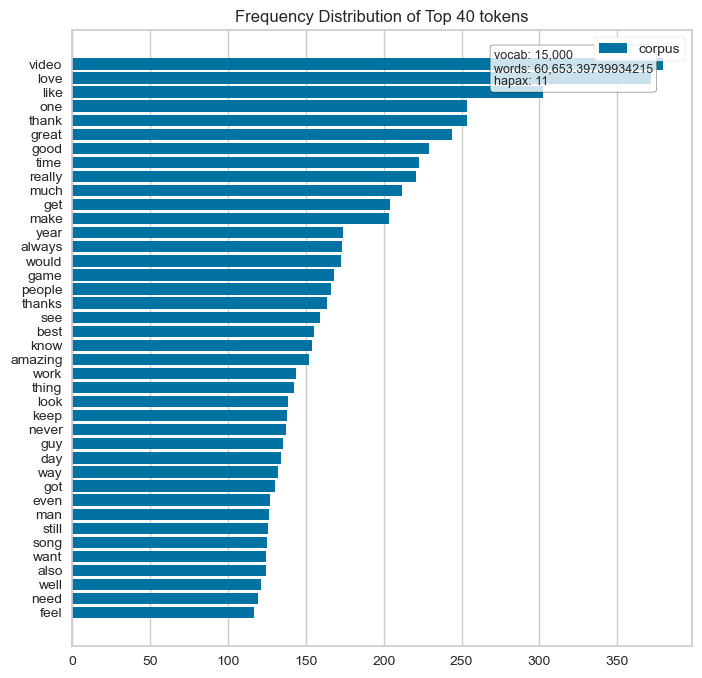

<AxesSubplot:title={'center':'Frequency Distribution of Top 40 tokens'}>

In [111]:

feature_eval = count_vec.get_feature_names_out()
fig, ax = plt.subplots(figsize=(8,8))
visualizer = FreqDistVisualizer(features=feature_eval, n=40)
visualizer.fit(bag_of_words_tfidf)
visualizer.poof()

#### Confusion matrix for best model Logistic regression using TF-IDF

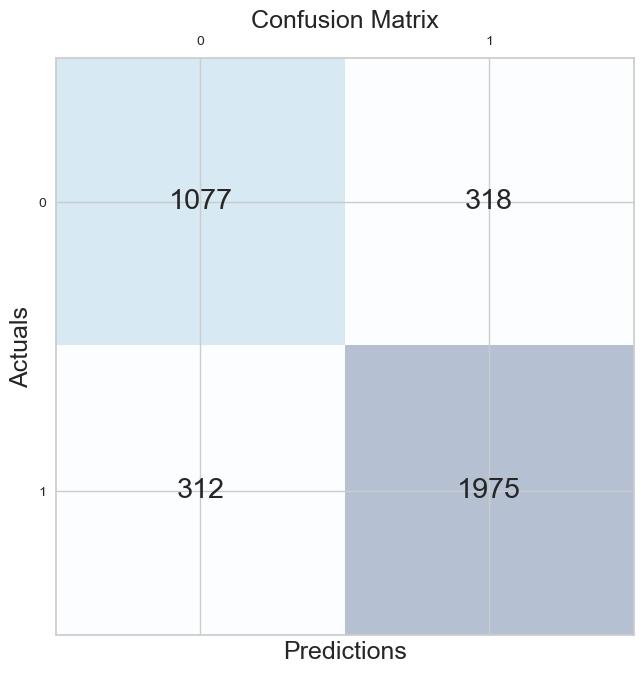

In [112]:
 
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_hat)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()